# Proyek Analisis Data: [Bike Sharing Dataset (Day)]
- **Nama:** [Kheni Hikmah Lestari]
- **Email:** [m001d4kx1593@bangkit.academy]
- **ID Dicoding:** [khenihikmah130303]

## Menentukan Pertanyaan Bisnis

- Pada musim apa saja total sewa sepeda paling banyak dan paling sedikit?
- Bagaimana total sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Read CSV

In [34]:
data = pd.read_csv('https://raw.githubusercontent.com/khenihikmah/Bangkit-Dashboard/master/dashboard/day.csv')
data.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Penjelasan data**

Data yang digunakan yaitu data "Bike Sharing per day" dengan keterangan sebagai berikut:
1. instant: record index
2. dteday : date
3. season : season (blue:springer, red:summer, black:fall, green:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.- -
9. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
10. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
11. hum: Normalized humidity. The values are divided to 100 (max)
12. windspeed: Normalized wind speed. The values are divided to 67 (max)
13. casual: count of casual users
14. registered: count of registered users
15. cnt: count of total rental bikes including both casual and registered


### Assessing Data


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data yang akan digunakan adalah *integer, float dan objec*t. Terdapat beberapa tipe data yang menjadi perhatian diantaranya adalah
1. Peubah ***dteday*** merupakan peubah yang bertipe *object*, padahal peubah tersebut merupakan tanggal, yang seharusnya bertipe data *datetime*.
2. Peubah ***season, year, month, holiday, weekday, workingday, weathersit***:merupakan peubah yang bertipe *integer*, padahal peubah-peubah tersebut merupakan peubah bertipe *category*.

#### Handling missing value

#### Detect Missing Value

In [36]:
data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Interpretasi :
Dapat dilihat bahwa data tidak terdapat missing value atau datanya lengkap.

### Memeriksa Duplicate Data

In [37]:
print("Duplicate: ", data.duplicated().sum())

Duplicate:  0


Tidak terdapat masalah duplikasi pada data.

**Memeriksa Parameter Statistik dari Kolom Numerik**

In [38]:
datanumerik = data.iloc[:, 9:16]
datanumerik.describe()


,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


##### Cleaning data

**Membersihkan Peubah *dteday***

In [39]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  data[column] = pd.to_datetime(data[column])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Data sudah sesuai yang diinginkan

**Membersihkan Peubah *season, yr, mnth, holiday, weekend, workingday, weathersit***

In [40]:
datacategory_columns = ['season', 'yr', 'mnth', 'weekday', 'holiday', 'workingday', 'weathersit']

for column in datacategory_columns:
  data[column] = data[column].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

Dapat dilihat bahwa tipe data pada peubah ***season, yr, mnth, holiday, weekday, workingday, weathersit*** sudah sesuai yaitu bertipe *category*.

## Exploratory Data Analysis (EDA)

In [41]:
# Mengganti nilai dalam kolom 'season' dengan label yang sesuai
data['season'] = data['season'].replace({1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Agregasi data, pada peubah temp, hum, serta windspeed dilakukan konversi pada nilai sebenarnya
datum = data.groupby(by="season").agg({
    "temp": lambda x: x.mean() * 41,
    "hum": lambda x: x.mean() * 100,
    "windspeed": lambda x: x.mean() * 67,
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
print(datum)


               temp        hum  windspeed  casual  registered      cnt
season                                                                
Springer  12.207650  58.290291  14.373984   60622      410726   471348
Summer    22.320611  62.694833  13.634978  203522      715067   918589
Fall      28.958682  63.348206  11.530366  226091      835038  1061129
Winter    17.339148  66.871917  11.523637  129782      711831   841613


C:\Users\ACER\AppData\Local\Temp\ipykernel_20156\2450695143.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datum = data.groupby(by="season").agg({


Dari pivot table diatas dapat dilihat bahwa jumah pengguna biasa (casual), jumlah pengguna terdaftar (registered) dan jumlah total sepeda sewaan termasuk casual dan registered **paling banyak** terdapat pada **season fall**, dan paling sedikit terdapat pada **season springer**.

Pada **season fall** orang paling banyak menyewa sepeda, hal ini dapat disebabkan karena beberapa faktor diantaranya yaitu suhu yang sejuk (tidak terlalu panas atau terlalu dingin) rata-rata berkisar sekitar 28.9°C, lalu kelembapan udara yang nyaman dengan rata-rata berkisar 63.3, serta kecepatan angin yang menyegarkan (tidak terlalu kencang) dengan rata-rata berkisar 11.53 km/jam.

In [42]:
# Mengganti nilai dalam kolom 'season' dengan label yang sesuai
data['workingday'] = data['workingday'].replace({1: 'Weekend/Holiday', 0: 'Lainnya'})
datum1= data.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
print(datum1)

                 casual  registered      cnt
workingday                                  
Lainnya          316732      683537  1000269
Weekend/Holiday  303285     1989125  2292410


C:\Users\ACER\AppData\Local\Temp\ipykernel_20156\2589852071.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  datum1= data.groupby(by="workingday").agg({


## Visualization & Explanatory Analysis

#### Data Visualization

Pertanyaan 1 : Bagaimana PM10 di setiap bulannya?

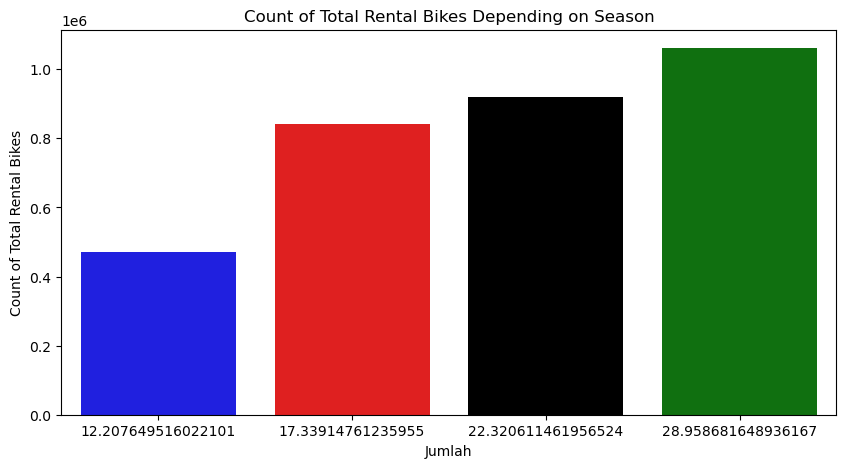

In [48]:
colors = ["Blue", "Red", "Black", "Green"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="temp",
    data=datum,
    palette=colors
)

plt.xlabel("Jumlah")
plt.ylabel("Count of Total Rental Bikes")
plt.title("Count of Total Rental Bikes Depending on Season")
plt.show()

2. Bagaimana median Jumlah O3 per Jam pada tahun tertentu?

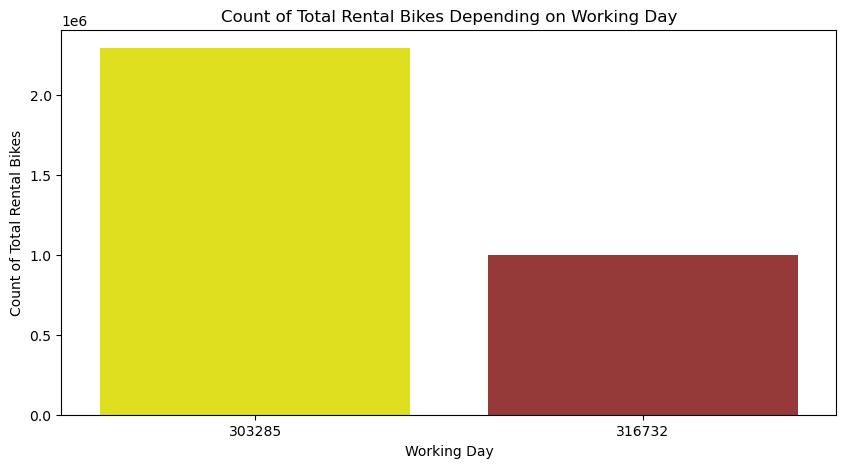

In [53]:
colors = ["Yellow", "Brown"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt",
    x="casual",
    data=datum1,
    palette=colors
)

plt.xlabel("Jumlah")
plt.ylabel("Count of Total Rental Bikes")
plt.title("Count of Total Rental Bikes Depending on Working Day")
plt.show()


### Conclution pertanyaan 1


Jumlah total sepeda sewaan termasuk casual dan registered paling banyak terjadi ***season fall* (musim gugur)**, dan paling sedikit terjadi ***season springer* (musim semi)**. Ini mungkin disebabkan oleh preferensi pengguna terhadap bersepeda yang lebih tinggi selama musim gugur dibandingkan dengan musim semi. Musim gugur sering dianggap sebagai waktu yang nyaman untuk bersepeda karena suhu yang lebih sejuk dan cuaca yang lebih stabil dibandingkan dengan musim semi yang sering bervariasi. Selain itu, musim gugur juga sering kali menjadi waktu yang ramai dengan acara-acara seperti festival atau perayaan, yang dapat meningkatkan minat masyarakat untuk menggunakan layanan sewa sepeda. Informasi ini dapat memberikan wawasan yang berharga bagi perusahaan sewa sepeda untuk menyesuaikan strategi operasional mereka, seperti menyesuaikan inventaris sepeda dan promosi untuk lebih memanfaatkan permintaan yang tinggi selama musim gugur.

### Conclution pertanyaan 2

Jumlah pengguna biasa (casual), jumlah pengguna terdaftar (registered), dan jumlah total sepeda sewaan termasuk casual dan registered paling banyak terjadi saat weekend/holiday, hal ini mungkin dikarenakan pada saat weekend/holiday seringkali menjadi waktu luang bagi banyak orang. Orang-orang cenderung memiliki lebih banyak waktu untuk melakukan aktivitas rekreasi atau bersantai, termasuk bersepeda. Informasi ini dapat memberikan wawasan yang berharga bagi perusahaan sewa sepeda untuk menyesuaikan strategi operasional mereka, seperti menyesuaikan inventaris sepeda dan promosi untuk lebih memanfaatkan permintaan yang tinggi selama weekend/holiday.
